# Stokes + Blos maps

- generate the Stokes I + V maps & Blos maps for the different resolutions for the 200G first snapshot of MURaM

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
from astropy.constants import c 
from astropy.io import fits
from skimage.transform import resize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import tracemalloc
from blos_binning_helper import *
from skimage.transform import downscale_local_mean

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as patches

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 100
font = {'size'   : 15}

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'



mpl.rc('font', **font)

/tmp/ipykernel_52111/2026243830.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
import sunpy
print(sunpy.__version__)

3.1.0


In [2]:
import astropy
print(astropy.__version__)

4.3.1


In [2]:
one_stokes = fits.getdata("/export/local/scratch/sinjan/spinor_fwd/ngrey_200G/200000/6173_masi_theta00/inverted_profs.1.fits")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


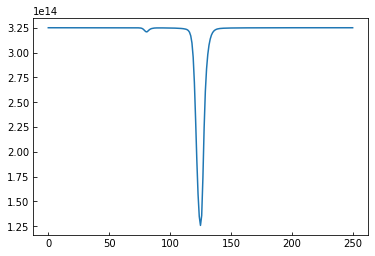

In [3]:
plt.figure()
plt.plot(one_stokes.mean(axis=(0,1))[0,:])
plt.show()

In [2]:
def make_stokes_profiles(folder, angle, snapshot, inst, remainder_mode = 'round', downscale_mean = False):
    data = load_data(folder, angle, snapshot)
    new_shape = get_inst_shape(inst, angle, remainder_mode)
    data = interp_data_to_nearest_divisible_integer(data, new_shape)
    data = rebin(data, new_shape, downscale_mean)
    return data

In [3]:
%matplotlib inline
test2 = make_stokes_profiles("ngrey_200G", angle = "00", snapshot = "200000", inst = 'HRT')

Remainder mode:  round
inst_y:  59.0
inst_x: : 59.0
interp_y:  295
interp_x:  295


In [3]:
hrt_stokes = make_stokes_profiles("ngrey_200G", angle = "00", snapshot = "200000", inst = 'HRT')
fdt_stokes = make_stokes_profiles("ngrey_200G", angle = "00", snapshot = "200000", inst = 'FDT')
hmi_stokes = make_stokes_profiles("ngrey_200G", angle = "00", snapshot = "200000", inst = 'HMI')

Remainder mode:  round
inst_y:  59.0
inst_x: : 59.0
interp_y:  295
interp_x:  295
Remainder mode:  round
inst_y:  8.0
inst_x: : 8.0
Remainder mode:  round
inst_y:  17.0
inst_x: : 17.0
interp_y:  289
interp_x:  289


In [7]:
hrt_stokes.shape

(59, 59, 4, 251)

In [8]:
one_stokes.shape

(288, 288, 4, 251)

In [4]:
test = make_stokes_profiles("ngrey_200G", angle = "00", snapshot = "200000", inst = 'HRT', downscale_mean = True)

Remainder mode:  round
inst_y:  59.0
inst_x: : 59.0
interp_y:  295
interp_x:  295


In [5]:
def get_ic(profiles):
    return profiles[:,:,0,:50].mean()

In [6]:
def norm_ic(profiles, og_stokes):
    Ic = get_ic(og_stokes)
    return profiles/Ic

In [7]:
def test_rebin(a,shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1],shape[2],shape[3]
    return a.reshape(sh).mean(-3).mean(1)[:,:,:,:]

In [ ]:
cmin = -0.1
cmax = 0.1
wv = 120
stokes = 3
fig = plt.figure(figsize = (20,8))
plt.subplot(141)
one_stokes_ic = norm_ic(one_stokes)
plt.imshow(one_stokes_ic[:,:,1,wv], cmap = "gist_heat") #way I loaded one_stokes was not the same
plt.gca().set_aspect('equal')
plt.title("SPINOR @ MURaM res.")
plt.clim(cmin,cmax)
plt.subplot(142)
hrt_stokes_ic = norm_ic(hrt_stokes)
plt.title("HRT @ 0.29au")
plt.imshow(hrt_stokes_ic[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.gca().set_aspect('equal')
plt.subplot(143)
hmi_stokes_ic = norm_ic(hmi_stokes)
plt.title("HMI @ 1au")
plt.imshow(hmi_stokes_ic[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.gca().set_aspect('equal')
plt.subplot(144)
fdt_stokes_ic = norm_ic(fdt_stokes)
fdt = plt.imshow(fdt_stokes_ic[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.title("FDT @ 0.28au")
ax_fdt = plt.gca()
plt.gca().set_aspect('equal')

axins = inset_axes(ax_fdt,width="5%",height="100%",loc='center right',borderpad=-2)
cbar = fig.colorbar(fdt, cax=axins, orientation="vertical", ticks=[cmin, 0, cmax])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.set_yticklabels([ f'{cmin}','0', f'{cmax}'])

plt.show()

In [8]:
hrt_stokes_05 = make_stokes_profiles("ngrey_200G", angle = "60", snapshot = "200000", inst = 'HRT')
fdt_stokes_05 = make_stokes_profiles("ngrey_200G", angle = "60", snapshot = "200000", inst = 'FDT')
hmi_stokes_05 = make_stokes_profiles("ngrey_200G", angle = "60", snapshot = "200000", inst = 'HMI')

Remainder mode:  round
inst_y:  30.0
inst_x: : 59.0
interp_y:  300
interp_x:  295
Remainder mode:  round
inst_y:  4.0
inst_x: : 8.0
Remainder mode:  round
inst_y:  8.0
inst_x: : 17.0
interp_y:  288
interp_x:  289


In [9]:
one_stokes_05 = fits.getdata("/export/local/scratch/sinjan/spinor_fwd/ngrey_200G/200000/6173_masi_theta60/inverted_profs.1.fits")
one_stokes_05 = test_rebin(one_stokes_05,(144,288,4,251))

In [11]:
one_stokes_05.shape

(144, 288, 4, 251)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

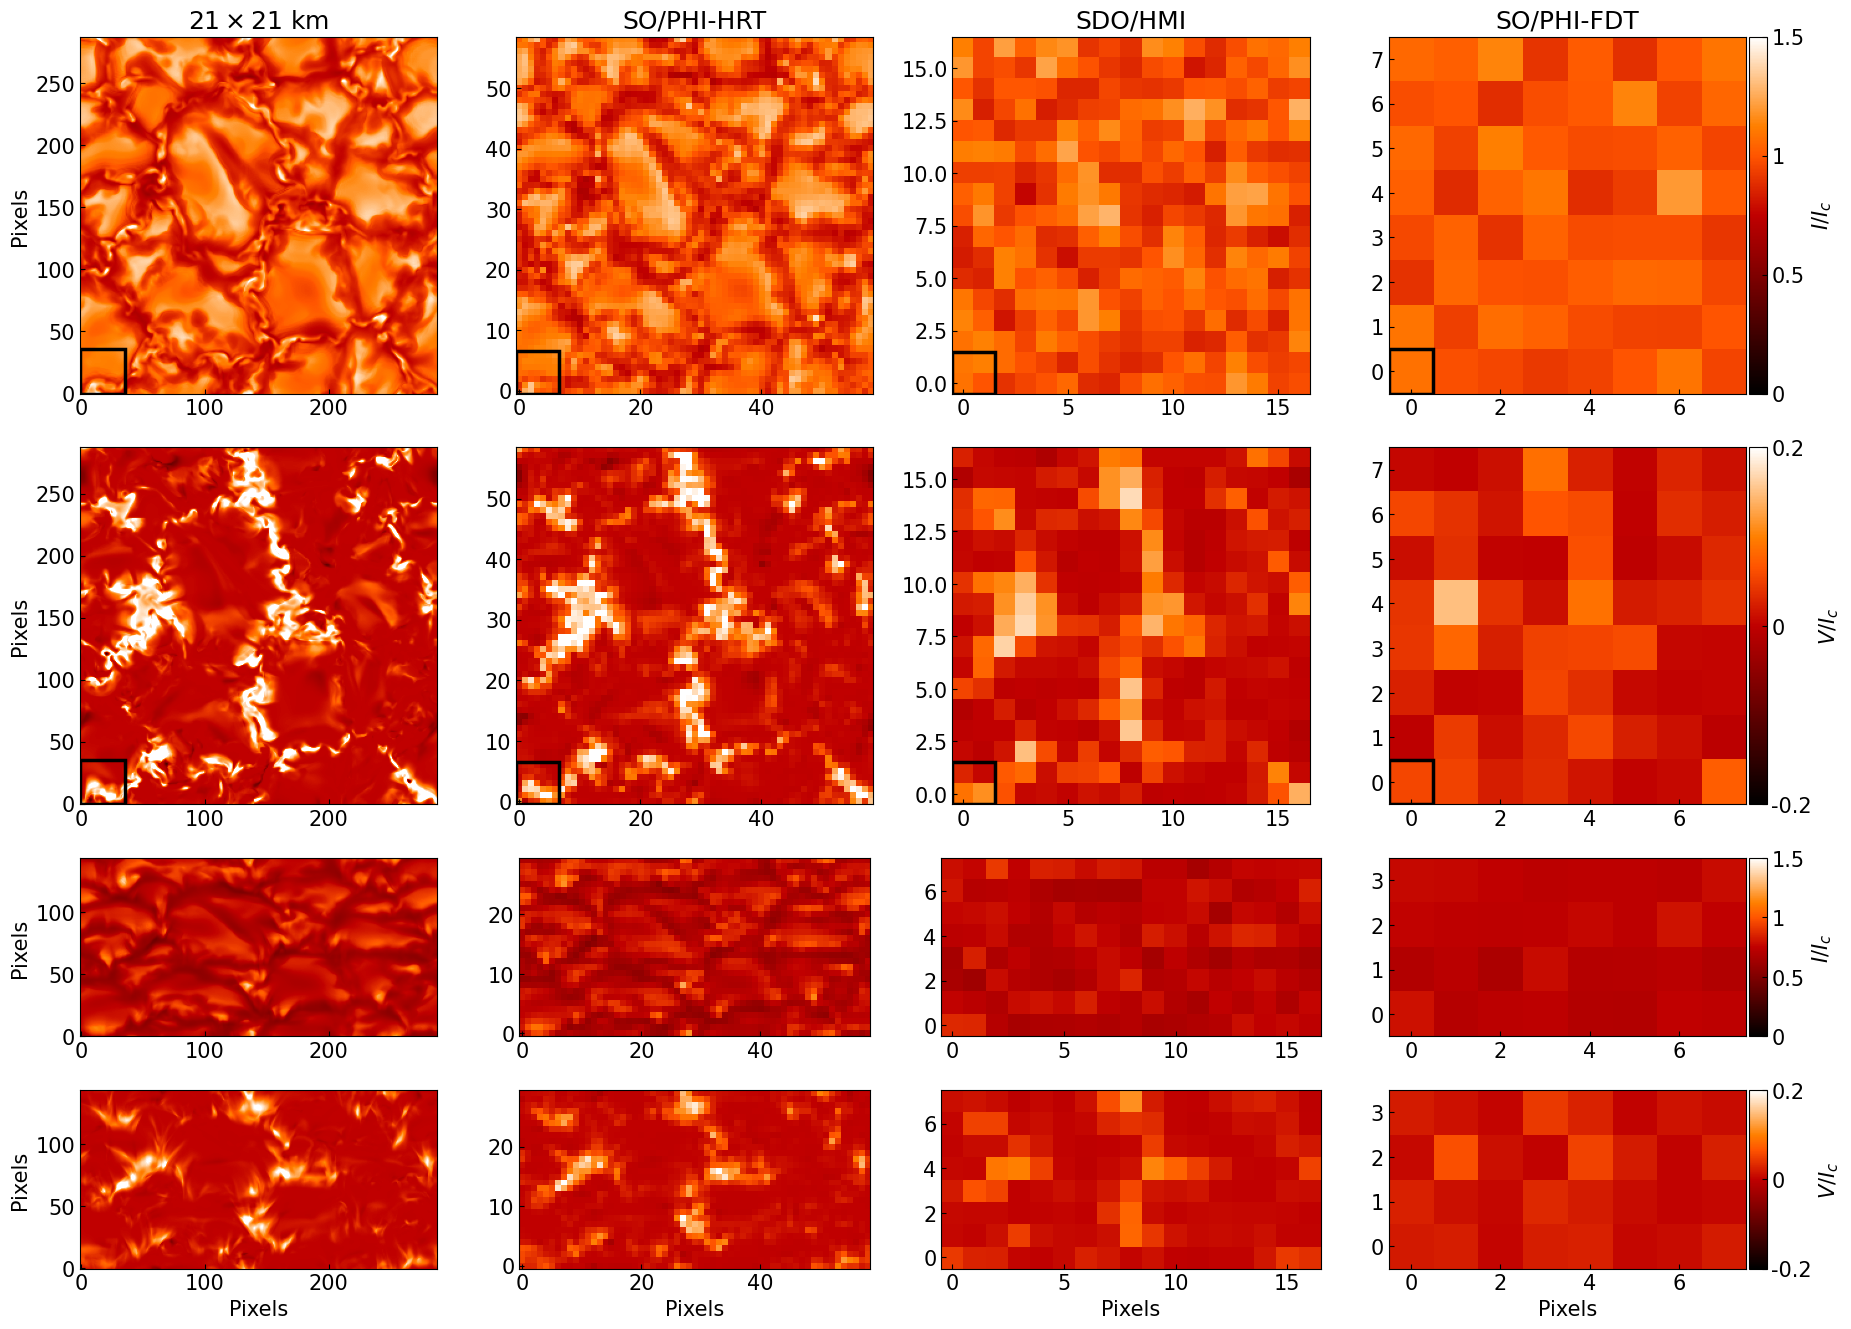

In [13]:
fig, ax = plt.subplots(4,4, figsize = (22,16), gridspec_kw={'height_ratios': [2,2,1,1], 'wspace':0.1})

wv = 100

plt.subplot(441)
one_stokes_ic = norm_ic(one_stokes,one_stokes)
plt.imshow(one_stokes_ic[:,:,0,wv], cmap = "gist_heat")
rect = patches.Rectangle((-0.5, -0.5), 36, 36, linewidth=2.5, edgecolor='black', facecolor='none')
ax[0,0].add_patch(rect)
# rect = patches.Rectangle((35.5, 143.5), 36, 36, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,0].add_patch(rect)
# rect = patches.Rectangle((71.5, 179.5), 36, 36, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,0].add_patch(rect)
# rect = patches.Rectangle((107.5, 215.5), 36, 36, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,0].add_patch(rect)
plt.gca().set_aspect('equal')
plt.title(r"$21\times21$ km")
plt.ylabel("Pixels")
plt.clim(0,1.5)

plt.subplot(442)
rect = patches.Rectangle((-0.5, -0.5), 7, 7, linewidth=2.5, edgecolor='black', facecolor='none')
ax[0,1].add_patch(rect)
# rect = patches.Rectangle((6.5, 29.5), 7, 7, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,1].add_patch(rect)
# rect = patches.Rectangle((14.5, 36.5), 7, 7, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,1].add_patch(rect)
# rect = patches.Rectangle((21.5, 43.5), 7, 7, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,1].add_patch(rect)
hrt_stokes_ic = norm_ic(hrt_stokes,one_stokes)
plt.title("SO/PHI-HRT")
plt.imshow(hrt_stokes_ic[:,:,0,wv], cmap = "gist_heat")
plt.clim(0,1.5)
plt.gca().set_aspect('equal')

plt.subplot(443)
rect = patches.Rectangle((-0.5, -0.5), 2, 2, linewidth=2.5, edgecolor='black', facecolor='none')
ax[0,2].add_patch(rect)
# rect = patches.Rectangle((1.5, 7.5), 2, 2, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,2].add_patch(rect)
# rect = patches.Rectangle((3.5, 10.5), 2, 2, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,2].add_patch(rect)
# rect = patches.Rectangle((6.5, 12.5), 2, 2, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,2].add_patch(rect)
hmi_stokes_ic = norm_ic(hmi_stokes,one_stokes)
plt.title("SDO/HMI")
plt.imshow(hmi_stokes_ic[:,:,0,wv], cmap = "gist_heat")
plt.clim(0,1.5)
plt.gca().set_aspect('equal')

plt.subplot(444)
fdt_stokes_ic = norm_ic(fdt_stokes,one_stokes)
fdt = plt.imshow(fdt_stokes_ic[:,:,0,wv], cmap = "gist_heat")
plt.clim(0,1.5)
rect = patches.Rectangle((-0.5, -0.5), 1, 1, linewidth=2.5, edgecolor='black', facecolor='none')
ax[0,3].add_patch(rect)
# rect = patches.Rectangle((0.5, 3.5), 1, 1, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,3].add_patch(rect)
# rect = patches.Rectangle((1.5, 4.5), 1, 1, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,3].add_patch(rect)
# rect = patches.Rectangle((2.5, 5.5), 1, 1, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,3].add_patch(rect)
plt.title("SO/PHI-FDT")
ax_fdt = plt.gca()
plt.gca().set_aspect('equal')

axins = inset_axes(ax_fdt,width="5%",height="100%",loc='center right',borderpad=-1)
cbar = fig.colorbar(fdt, cax=axins, orientation="vertical", ticks=[0, 0.5, 1.0, 1.5])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$I/I_c$")
cbar.ax.set_yticklabels(['0','0.5', '1', '1.5'])

cmin = -0.2
cmax = 0.2
wv = 120
stokes = 3

plt.subplot(445)
plt.imshow(one_stokes_ic[:,:,1,wv], cmap = "gist_heat") #way I loaded one_stokes was not the same
rect = patches.Rectangle((-0.5, -0.5), 36, 36, linewidth=2.5, edgecolor='black', facecolor='none')
ax[1,0].add_patch(rect)
# rect = patches.Rectangle((35.5, 143.5), 36, 36, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[1,0].add_patch(rect)
# rect = patches.Rectangle((71.5, 179.5), 36, 36, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[1,0].add_patch(rect)
# rect = patches.Rectangle((107.5, 215.5), 36, 36, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[1,0].add_patch(rect)
plt.gca().set_aspect('equal')
plt.ylabel("Pixels")
plt.clim(cmin,cmax)

plt.subplot(446)
rect = patches.Rectangle((-0.5, -0.5), 7, 7, linewidth=2.5, edgecolor='black', facecolor='none')
ax[1,1].add_patch(rect)
# rect = patches.Rectangle((6.5, 29.5), 7, 7, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[1,1].add_patch(rect)
# rect = patches.Rectangle((14.5, 36.5), 7, 7, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[1,1].add_patch(rect)
# rect = patches.Rectangle((21.5, 43.5), 7, 7, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[1,1].add_patch(rect)
plt.imshow(hrt_stokes_ic[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.gca().set_aspect('equal')

plt.subplot(447)
rect = patches.Rectangle((-0.5, -0.5), 2, 2, linewidth=2.5, edgecolor='black', facecolor='none')
ax[1,2].add_patch(rect)
# rect = patches.Rectangle((1.5, 7.5), 2, 2, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[1,2].add_patch(rect)
# rect = patches.Rectangle((3.5, 10.5), 2, 2, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[1,2].add_patch(rect)
# rect = patches.Rectangle((6.5, 12.5), 2, 2, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[1,2].add_patch(rect)
plt.imshow(hmi_stokes_ic[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.gca().set_aspect('equal')

plt.subplot(448)
fdt = plt.imshow(fdt_stokes_ic[:,:,stokes,wv], cmap = "gist_heat")
rect = patches.Rectangle((-0.5, -0.5), 1, 1, linewidth=2.5, edgecolor='black', facecolor='none')
ax[1,3].add_patch(rect)
# rect = patches.Rectangle((0.5, 3.5), 1, 1, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[1,3].add_patch(rect)
# rect = patches.Rectangle((1.5, 4.5), 1, 1, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[1,3].add_patch(rect)
# rect = patches.Rectangle((2.5, 5.5), 1, 1, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[1,3].add_patch(rect)
plt.clim(cmin,cmax)
ax_fdt = plt.gca()
plt.gca().set_aspect('equal')

axins = inset_axes(ax_fdt,width="5%",height="100%",loc='center right',borderpad=-1)
cbar = fig.colorbar(fdt, cax=axins, orientation="vertical", ticks=[cmin, 0, cmax])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$V/I_c$")
cbar.ax.set_yticklabels([ f'{cmin}','0', f'{cmax}'])

cmin = 0
cmax = 1.5
wv = 100
stokes = 0

plt.subplot(4,4,9)
one_stokes_ic_05 = norm_ic(one_stokes_05,one_stokes)
plt.imshow(one_stokes_ic_05[:,:,stokes,wv], cmap = "gist_heat")
plt.gca().set_aspect('equal')
plt.ylabel("Pixels")
plt.clim(0,1.5)
plt.subplot(4,4,10)
hrt_stokes_ic_05 = norm_ic(hrt_stokes_05,one_stokes)
plt.imshow(hrt_stokes_ic_05[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(0,1.5)
plt.gca().set_aspect('equal')
plt.subplot(4,4,11)
hmi_stokes_ic_05 = norm_ic(hmi_stokes_05,one_stokes)
plt.imshow(hmi_stokes_ic_05[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(0,1.5)
plt.gca().set_aspect('equal')
plt.subplot(4,4,12)
fdt_stokes_ic_05 = norm_ic(fdt_stokes_05,one_stokes)
fdt = plt.imshow(fdt_stokes_ic_05[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(0,1.5)
ax_fdt = plt.gca()
plt.gca().set_aspect('equal')

axins = inset_axes(ax_fdt,width="5%",height="100%",loc='center right',borderpad=-1)
cbar = fig.colorbar(fdt, cax=axins, orientation="vertical", ticks=[0, 0.5, 1.0, 1.5])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$I/I_c$")
cbar.ax.set_yticklabels(['0','0.5', '1', '1.5'])

cmin = -0.2
cmax = 0.2
wv = 120
stokes = 3

plt.subplot(4,4,13)
plt.imshow(one_stokes_ic_05[:,:,1,wv], cmap = "gist_heat") #way I loaded one_stokes was not the same
plt.gca().set_aspect('equal')
plt.ylabel("Pixels")
plt.xlabel("Pixels")
plt.clim(cmin,cmax)
plt.subplot(4,4,14)
plt.imshow(hrt_stokes_ic_05[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.xlabel("Pixels")
plt.gca().set_aspect('equal')
plt.subplot(4,4,15)
plt.imshow(hmi_stokes_ic_05[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.xlabel("Pixels")
plt.gca().set_aspect('equal')
plt.subplot(4,4,16)
fdt = plt.imshow(fdt_stokes_ic_05[:,:,stokes,wv], cmap = "gist_heat")
plt.clim(cmin,cmax)
plt.xlabel("Pixels")
ax_fdt = plt.gca()
plt.gca().set_aspect('equal')

axins = inset_axes(ax_fdt,width="5%",height="100%",loc='center right',borderpad=-1)
cbar = fig.colorbar(fdt, cax=axins, orientation="vertical", ticks=[cmin, 0, cmax])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$V/I_c$")
cbar.ax.set_yticklabels([ f'{cmin}','0', f'{cmax}'])

#plt.savefig('./plots/stokes_plots_one_box_100cont.png', bbox_inches='tight', dpi=300)
plt.show()

In [68]:
np.max(og_blos)

2388.3979618321737

In [2]:
import sunpy.visualization.colormaps as cm

In [3]:
magmap = mpl.colormaps['hmimag']

In [4]:
from blos_binning_helper import get_blos_inst_pixel

In [6]:
folder = 'ngrey_200G'
ang = '00'
snapshot = '200000'

og_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

hrt_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

hmi_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

fdt_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  288.0
inst_x: : 288.0
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(288, 288, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  59.0
inst_x: : 59.0
interp_y:  295
interp_x:  295
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(59, 59, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  17.0
inst_x: : 17.0
interp_y:  289
interp_x:  289
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(17, 17, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos/
--------START---------
Folder:

In [7]:
folder = 'ngrey_200G'
ang = '60'
snapshot = '200000'

og_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

hrt_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

hmi_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

fdt_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  144.0
inst_x: : 288.0
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(144, 288, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  30.0
inst_x: : 59.0
interp_y:  300
interp_x:  295
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(30, 59, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  8.0
inst_x: : 17.0
interp_y:  288
interp_x:  289
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(8, 17, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos/
--------START---------
Folder:  

In [5]:
folder = 'ngrey_200G'
ang = '00'
snapshot = '200000'

og_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='pymilos', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

hrt_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

hmi_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='pymilos', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

fdt_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='pymilos', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  288.0
inst_x: : 288.0
-------PREP END--------
----PYMILOS BLOS------
non contiguous vector
Options [in pymilos]:  [51 30  1  0  0  0  0  0  0]
input_data shape [in pymilos]:  82944 4 51
------ flattened:  (16920576,)
Weights  [in pymilos]:  [1. 1. 1. 1.]
Initial Model  [in pymilos]:  [4.0e+02 3.0e+01 1.2e+02 3.0e+00 5.0e-02 1.5e+00 1.0e-02 2.2e-01 8.5e-01]
Options [in pymilos]:  [51 30  1  0  0  0  0  0  0]
input_data shape [in pymilos]:  1502 4 51
------ flattened:  (306408,)
Weights  [in pymilos]:  [1. 1. 1. 1.]
Initial Model  [in pymilos]:  [4.0e+02 3.0e+01 1.2e+02 5.0e+01 5.0e-02 1.5e+00 1.0e-02 2.2e-01 8.5e-01]
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  59.0
inst_x: : 59.0
interp_y:  295
interp_x:  295
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(59, 59, 4, 51)
--------START----

In [6]:
folder = 'ngrey_200G'
ang = '60'
snapshot = '200000'

og_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='pymilos', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

hrt_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

hmi_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='pymilos', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

fdt_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='pymilos', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=30)

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  144.0
inst_x: : 288.0
-------PREP END--------
----PYMILOS BLOS------
non contiguous vector
Options [in pymilos]:  [51 30  1  0  0  0  0  0  0]
input_data shape [in pymilos]:  41472 4 51
------ flattened:  (8460288,)
Weights  [in pymilos]:  [1. 1. 1. 1.]
Initial Model  [in pymilos]:  [4.0e+02 3.0e+01 1.2e+02 3.0e+00 5.0e-02 1.5e+00 1.0e-02 2.2e-01 8.5e-01]
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  30.0
inst_x: : 59.0
interp_y:  300
interp_x:  295
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(30, 59, 4, 51)
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  8.0
inst_x: : 17.0
interp_y:  288
interp_x:  289
-------PREP END--------
----PYMILOS BLOS------
Options [in pymilos]:  [51 30  1  0  0  0  0  0  0]
input_data shape [in pymilos]: 

In [5]:
folder = 'ngrey_200G'
ang = '00'
snapshot = '200000'

og_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

hrt_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

hmi_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

fdt_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  288.0
inst_x: : 288.0
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(288, 288, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  59.0
inst_x: : 59.0
interp_y:  295
interp_x:  295
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(59, 59, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  17.0
inst_x: : 17.0
interp_y:  289
interp_x:  289
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(17, 17, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/


In [6]:
folder = 'ngrey_200G'
ang = '60'
snapshot = '200000'

og_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

hrt_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

hmi_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

fdt_blos_60 = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               ext='_1551', q_u_0 = False, niter=50)

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  144.0
inst_x: : 288.0
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(144, 288, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  30.0
inst_x: : 59.0
interp_y:  300
interp_x:  295
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(30, 59, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  60
Remainder mode:  round
inst_y:  8.0
inst_x: : 17.0
interp_y:  288
interp_x:  289
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(8, 17, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--

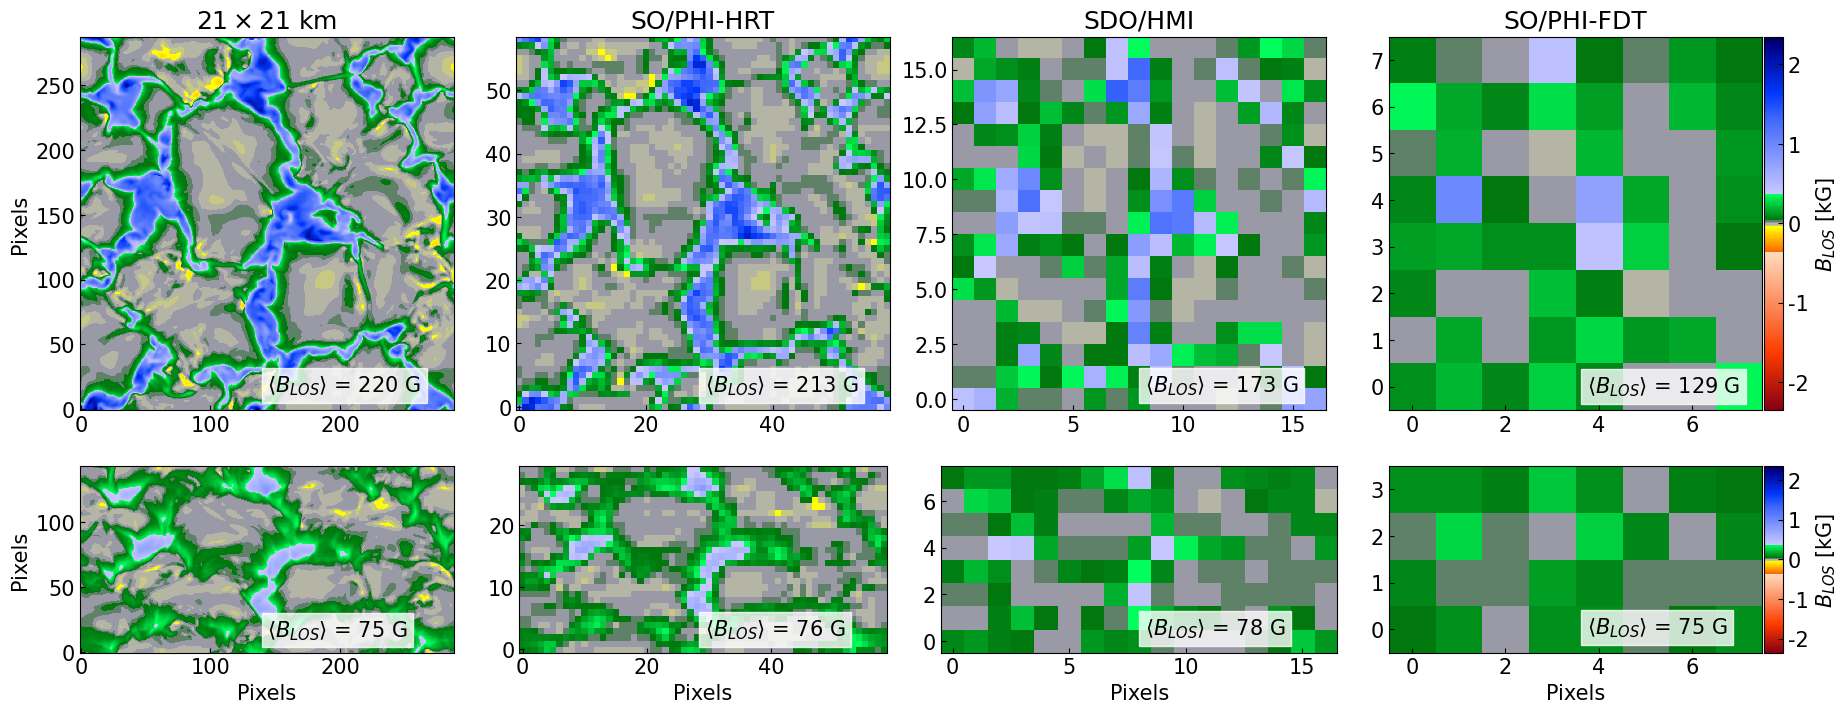

In [8]:
fig, ax = plt.subplots(2,4, figsize = (22,8), gridspec_kw={'height_ratios': [2,1], 'wspace':0.1})

cmin = -2350#np.max(abs(og_blos))#-150
cmax = 2350#np.max(abs(og_blos))

plt.subplot(241)
plt.imshow(og_blos,cmap=magmap, origin="lower")
rect = patches.Rectangle((-0.5, -0.5), 36, 36, linewidth=2.5, edgecolor='black', facecolor='none')
#ax[0,0].add_patch(rect)
# rect = patches.Rectangle((35.5, 143.5), 36, 36, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,0].add_patch(rect)
# rect = patches.Rectangle((71.5, 179.5), 36, 36, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,0].add_patch(rect)
# rect = patches.Rectangle((107.5, 215.5), 36, 36, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,0].add_patch(rect)
plt.gca().set_aspect('equal')
plt.title(r"$21\times21$ km")
plt.ylabel("Pixels")
plt.clim(cmin,cmax)
ax1 = plt.gca()
ylims = ax1.get_ylim()
xlims = ax1.get_xlim()
t = ax1.text(0.5*xlims[1],0.05*ylims[1]-0.5, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(og_blos):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplot(242)
rect = patches.Rectangle((-0.5, -0.5), 7, 7, linewidth=2.5, edgecolor='black', facecolor='none')
#ax[0,1].add_patch(rect)
# rect = patches.Rectangle((6.5, 29.5), 7, 7, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,1].add_patch(rect)
# rect = patches.Rectangle((14.5, 36.5), 7, 7, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,1].add_patch(rect)
# rect = patches.Rectangle((21.5, 43.5), 7, 7, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,1].add_patch(rect)
plt.title("SO/PHI-HRT")
plt.imshow(hrt_blos,cmap=magmap)
plt.clim(cmin,cmax)
plt.gca().set_aspect('equal')
ax4 = plt.gca()
ylims = ax4.get_ylim()
xlims = ax4.get_xlim()
t = ax4.text(0.5*xlims[1],0.05*ylims[1]-0.5, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(hrt_blos):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplot(243)
rect = patches.Rectangle((-0.5, -0.5), 2, 2, linewidth=2.5, edgecolor='black', facecolor='none')
#ax[0,2].add_patch(rect)
# rect = patches.Rectangle((1.5, 7.5), 2, 2, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,2].add_patch(rect)
# rect = patches.Rectangle((3.5, 10.5), 2, 2, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,2].add_patch(rect)
# rect = patches.Rectangle((6.5, 12.5), 2, 2, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,2].add_patch(rect)
plt.title("SDO/HMI")
plt.imshow(hmi_blos,cmap=magmap)
plt.clim(cmin,cmax)
plt.gca().set_aspect('equal')
ax4 = plt.gca()
ylims = ax4.get_ylim()
xlims = ax4.get_xlim()
t = ax4.text(0.5*xlims[1],0.05*ylims[1]-0.5, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(hmi_blos):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplot(244)
fdt = plt.imshow(fdt_blos,cmap=magmap)
plt.clim(cmin,cmax)
rect = patches.Rectangle((-0.5, -0.5), 1, 1, linewidth=2.5, edgecolor='black', facecolor='none')
#ax[0,3].add_patch(rect)
# rect = patches.Rectangle((0.5, 3.5), 1, 1, linewidth=2.5, edgecolor='red', facecolor='none')
# ax[0,3].add_patch(rect)
# rect = patches.Rectangle((1.5, 4.5), 1, 1, linewidth=2.5, edgecolor='white', facecolor='none')
# ax[0,3].add_patch(rect)
# rect = patches.Rectangle((2.5, 5.5), 1, 1, linewidth=2.5, edgecolor='magenta', facecolor='none')
# ax[0,3].add_patch(rect)
plt.title("SO/PHI-FDT")
ax_fdt = plt.gca()
plt.gca().set_aspect('equal')
ylims = ax_fdt.get_ylim()
xlims = ax_fdt.get_xlim()
t = ax_fdt.text(0.5*xlims[1],0.05*ylims[1]-0.5, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(fdt_blos):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

axins = inset_axes(ax_fdt,width="5%",height="100%",loc='center right',borderpad=-1)
cbar = fig.colorbar(fdt, cax=axins, orientation="vertical", ticks=[-2000,-1000,0,1000,2000])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$B_{LOS}$ [kG]")
cbar.ax.set_yticklabels(['-2','-1', '0', '1','2'])

plt.subplot(2,4,5)
plt.imshow(og_blos_60,cmap=magmap, origin="lower")
plt.gca().set_aspect('equal')
plt.ylabel("Pixels")
plt.xlabel("Pixels")
plt.clim(cmin,cmax)
ax4 = plt.gca()
ylims = ax4.get_ylim()
xlims = ax4.get_xlim()
t = ax4.text(0.5*xlims[1],0.05*ylims[1]+5, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(og_blos_60):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplot(2,4,6)
plt.imshow(hrt_blos_60,cmap=magmap)
plt.clim(cmin,cmax)
plt.xlabel("Pixels")
plt.gca().set_aspect('equal')
ax4 = plt.gca()
ylims = ax4.get_ylim()
xlims = ax4.get_xlim()
t = ax4.text(0.5*xlims[1],0.05*ylims[1]+0.8, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(hrt_blos_60):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplot(2,4,7)
plt.imshow(hmi_blos_60,cmap=magmap)
plt.clim(cmin,cmax)
plt.xlabel("Pixels")
plt.gca().set_aspect('equal')
ax4 = plt.gca()
ylims = ax4.get_ylim()
xlims = ax4.get_xlim()
t = ax4.text(0.5*xlims[1],0.05*ylims[1]-0.1, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(hmi_blos_60):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplot(2,4,8)
fdt = plt.imshow(fdt_blos_60,cmap=magmap)
plt.clim(cmin,cmax)
ax_fdt = plt.gca()
plt.xlabel("Pixels")
plt.gca().set_aspect('equal')
ax4 = plt.gca()
ylims = ax4.get_ylim()
xlims = ax4.get_xlim()
t = ax4.text(0.5*xlims[1],-0.1, s = r'$\langle B_{LOS} \rangle$ = ' + f'{np.mean(fdt_blos_60):.0f} G', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

axins = inset_axes(ax_fdt,width="5%",height="100%",loc='center right',borderpad=-1)
cbar = fig.colorbar(fdt, cax=axins, orientation="vertical", ticks=[-2000,-1000,0,1000,2000])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$B_{LOS}$ [kG]")
cbar.ax.set_yticklabels(['-2','-1', '0', '1','2'])

plt.savefig('./plots/blos_plots_one_box_cmilos_1551_nobox.png', bbox_inches='tight', dpi=300)

In [8]:
np.max(og_blos)

2363.499575344396

In [9]:
np.mean(og_blos)

219.69076863299176

In [10]:
np.max(og_blos)

2322.08058415815

In [11]:
np.mean(og_blos)

219.0628619834808

In [33]:
%matplotlib inline